<a href="https://colab.research.google.com/github/Leito2022/Water_qualit/blob/Leo/Water_quality1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ÍNDICE**

1.  INTRODUCCIÓN
2.  PREPROCESAMIENTO DE DATOS
3.  MODELO DE REGRESIÓN LINEAL
4.  MODELO NAIVE BAYES
5.  MODELO ADA BOOST
6.  CONCLUSIÓN

# **INTRODUCCIÓN**
**CALIDAD DEL AGUA** (Water_Quality)

Data set: https://www.kaggle.com/datasets/adityakadiwal/water-potability .

Autor: Rodríguez Jorge Leonardo.

El presente proyecto intentará generar un modelo de clasificación que permita determinar si una muestra de agua posee las condiciones de potabilidad o no, algo bastante útil para aquellas empresas que utilicen o manipulen el agua en sus procesos productivos.

Podemos hacer una breve descripción de las features que presenta el dataset:



1.   pH value: Ph es un importante parametro en la evaluación del balance ácido del agua. Indica acidez o alcalinidad del agua. WHO () recomienda un limite de ph entre 6.5 y 8.5.
2.   Hardness (Dureza): Es causado por las sales de calcio y el magnesio. Estas sales se disuelven de depositos geologicos por donde viajan el agua.
3.   Solids (Sólidos): El agua tiene la capacidad de disolver diversos solidos que alteran el sabor o el color del agua. Es un parametro importante para la potabilidad del agua. Un valor alto indica que el agua esta altamente mineralizada, es deseable un valor 500mg/l y un máximo de 1000mg/l.
4.   Chloramines(Cloramina):El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman más comúnmente cuando se agrega amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.
5.   Sulfate (Sulfato): El sulfato es una sustancia natural que se encuentra en los minerales, el suelo y las rocas. Son utilizados en la industria química. Un valor deseable para la potabilidad es de 3mg/l a 30mg/l.
6.   Conductivity(Conductividad): El agua pura no es un buen conductor de corriente eléctrica, sino un buen aislante. El aumento de la concentración de iones mejora la conductividad eléctrica del agua. Generalmente, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) en realidad mide el proceso iónico de una solución que le permite transmitir corriente. De acuerdo con las normas de la OMS, el valor CE no debe exceder de 400 μS/cm.
7.   Organic_carbon (Carbón Organico): El carbono orgánico total (TOC, Total Organic Carbon) en las aguas de origen proviene de la materia orgánica natural en descomposición (NOM, Natural Organic Matter), así como de fuentes sintéticas. El TOC es una medida de la cantidad total de carbono en compuestos orgánicos en agua pura. De acuerdo con la EPA de los Estados Unidos, < 2 mg / L como TOC en agua tratada / potable, y < 4 mg / Lit en agua de origen que se utiliza para el tratamiento.
8.   Trihalomethanes (Trihalometanos): Los THM son sustancias químicas que se pueden encontrar en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de material orgánico en el agua, la cantidad de cloro requerida para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM de hasta 80 ppm se consideran seguros en el agua potable.
9.   Turbity (Turbidez): La turbidez del agua depende de la cantidad de materia sólida presente en estado suspensivo. Es una medida de las propiedades emisoras de luz del agua y la prueba se utiliza para indicar la calidad de la descarga de residuos con respecto a la materia coloidal. El valor medio de turbidez obtenido para Wondo Genet Campus (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU.
10.  Potability (Potabilidad): Target que establece si el agua es segura para el consumo humano (1 = Potable) o no (0 = No potable).








# **LIBRERIAS Y SUBA DE ARCHIVO**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
#Suba del archivo

from google.colab import files
import io

file = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
df_water = pd.read_csv(io.BytesIO(file["water_potability.csv"]))



# **PREPROCESAMIENTO DE DATOS**

In [ ]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Observamos la proporcion de los datos del target
df_water["Potability"].value_counts(True)
#df_water["Potability"].value_counts()

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [ ]:
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Contamos los na que existen en nuestro DF

df_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print('% de registros con al menos un valor nulo:     ', np.round(100 * df_water.isna().any(axis=1).sum() / df_water.shape[0], 1))
#Observamos que el nivel de % de registros con datos nulos es bastante elevado.

% de registros con al menos un valor nulo:      38.6


In [ ]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


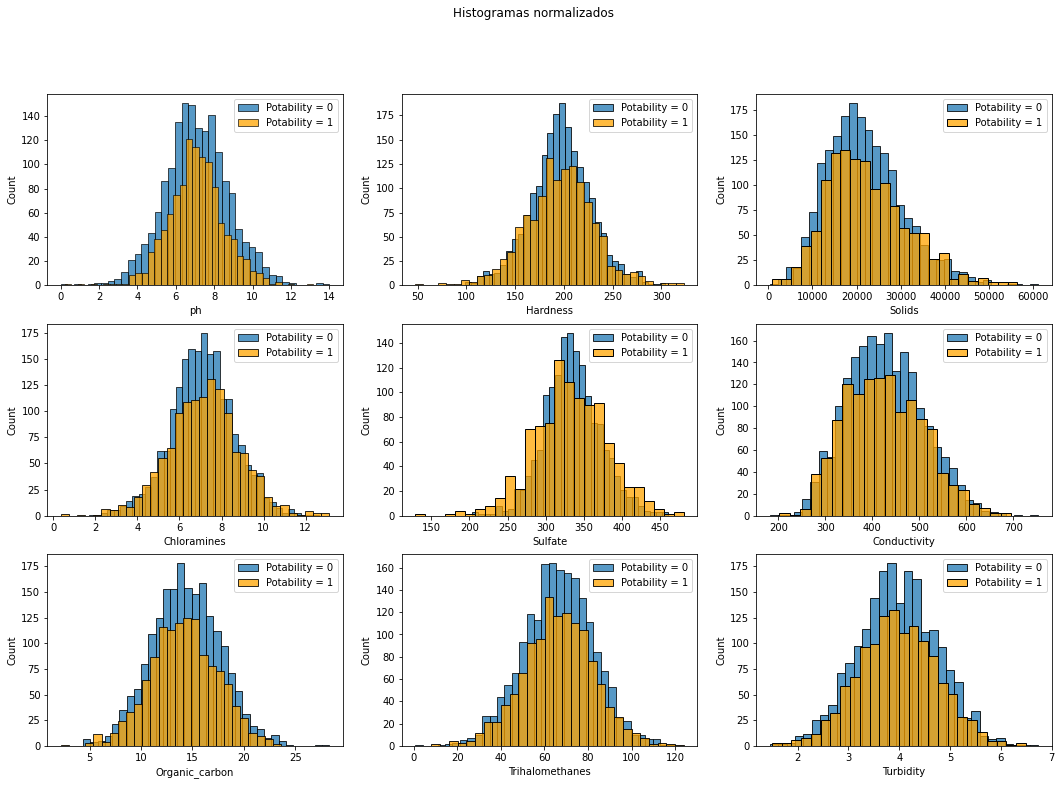

In [ ]:
# Creamos un grafico para cada feature discriminando por el valor del target con un loop
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df_water.columns[:-1], axes.flatten()):
    sns.histplot(data = df_water.loc[df_water['Potability']==0, c].dropna(), stat = 'count', ax = ax, kde = False )
    sns.histplot(data = df_water.loc[df_water['Potability']==1, c].dropna(), stat = 'count', kde=False, ax=ax, color = 'orange')
    ax.legend(['Potability = 0', 'Potability = 1'])
# Importante: el grafico utiliza el metodo "density" que permite comparar las clases desbalanceadas (ver que ocurre con otro metodos)

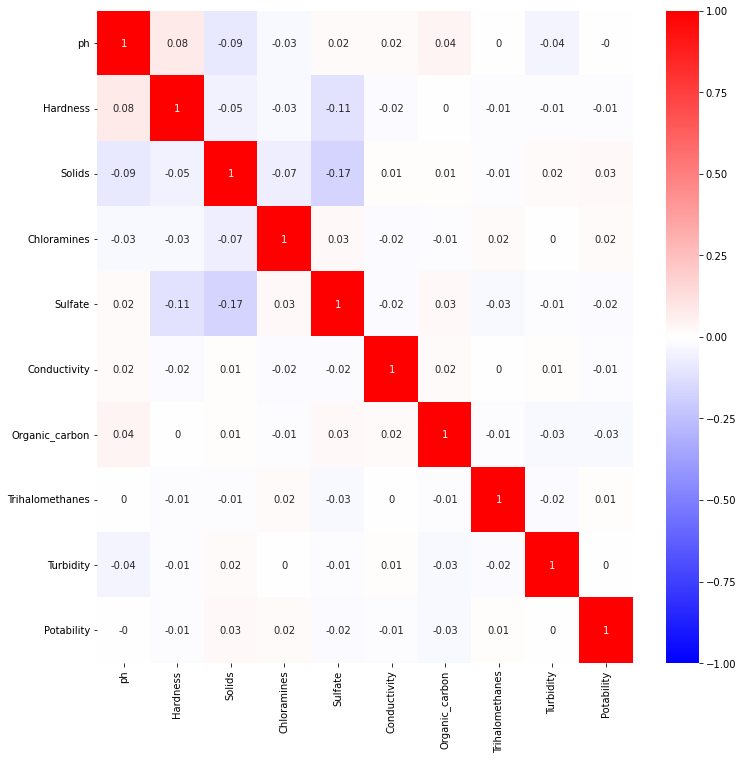

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_water.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='bwr')

# **IMPORTANTE**

Analizando detenidamente los datos extraidos, resulta curioso que las variables posean una independencia casi absoluta entre sí y con el target, también resulta curioso que la distribución de los datos discriminados por el target (potables - no potables) se solapan. Esto es importante por que nos indica que las muestras no son fiables, no son contundentes para determinar si una muestra es o no potable, por ende se puede presumir que los datos son falsos o inexactos y que no se puede generar un modelo fiable para ser aplicable. Veamos si esto es correcto realizando distintos modelos de clasificación.


In [ ]:
#Es dificil decidir acerca de los NA que presenta el data set. Como vimos representan un gran % del mismo.
#Eliminarlos no parece lógico debido a la gran cantidad que tenemos.
#Sacar el promedio puede desvirtuar la muestra, pues su categorización depende del valor que pueda adoptar los NA.
#Por lo que, de una forma rebuscada, sacaremos los promedios de la columna ph tanto para el caso en que el target sea 0 o 1
#luego se reemplazará los NA con los promedios según el parametro potability sea 0 o 1.
import matplotlib.pyplot as plt

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Ph cuando el agua NO es potable: ", ph_1.ph.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Ph cuando el agua SI es potable: ", ph_2.ph.mean())



Promedio de Ph cuando el agua NO es potable:  7.085378435983544
Promedio de Ph cuando el agua SI es potable:  7.0737832953812


(array([  2.,   3.,  19., 103., 292., 423., 186.,  63.,   8.,   2.]),
 array([ 0.22749905,  1.52228932,  2.81707959,  4.11186985,  5.40666012,
         6.70145039,  7.99624065,  9.29103092, 10.58582119, 11.88061146,
        13.17540172]),
 <a list of 10 Patch objects>)

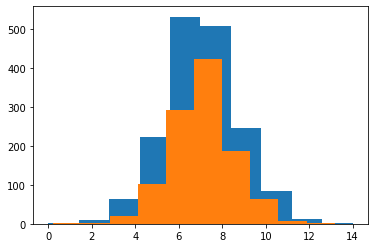

In [ ]:
plt.hist(x = ph_1["ph"])
plt.hist(x = ph_2["ph"])

In [ ]:
#Observamos que tanto en las muestras con potabilidad 1 como con potabilidad 0 el promedio del ph es casi igual
#por lo que reemplazaremos los NaN de ph por el promedio general de la columna.

df_water["ph"].fillna(value = df_water.ph.mean(), inplace = True)

Promedio de Sulfato cuando el agua NO es potable:  334.5642895786881
Promedio de Sulfato cuando el agua SI es potable:  332.5669902336656


(array([  1.,   5.,  17.,  61., 187., 291., 245., 125.,  46.,   7.]),
 array([129.        , 164.20306423, 199.40612846, 234.60919269,
        269.81225692, 305.01532115, 340.21838538, 375.42144961,
        410.62451384, 445.82757808, 481.03064231]),
 <a list of 10 Patch objects>)

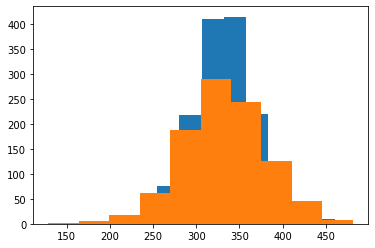

In [ ]:
#Procedemos a repetir los pasos con las demas variables que poseen NaN (sulfate)

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Sulfato cuando el agua NO es potable: ", ph_1.Sulfate.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Sulfato cuando el agua SI es potable: ", ph_2.Sulfate.mean())

plt.hist(x = ph_1["Sulfate"])
plt.hist(x = ph_2["Sulfate"])

In [ ]:
df_water["Sulfate"].fillna(value = df_water["Sulfate"].mean(), inplace = True)

Promedio de Sulfato cuando el agua NO es potable:  66.30355527306088
Promedio de Sulfato cuando el agua SI es potable:  66.53968374070116


(array([  6.,  16.,  68., 179., 326., 332., 202.,  70.,  18.,   6.]),
 array([  8.17587638,  19.75828875,  31.34070111,  42.92311347,
         54.50552583,  66.08793819,  77.67035055,  89.25276292,
        100.83517528, 112.41758764, 124.        ]),
 <a list of 10 Patch objects>)

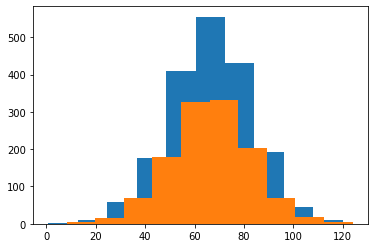

In [ ]:
#Proseguimos con la última variable Trihalomethanes

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Sulfato cuando el agua NO es potable: ", ph_1.Trihalomethanes.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Sulfato cuando el agua SI es potable: ", ph_2.Trihalomethanes.mean())

plt.hist(x = ph_1["Trihalomethanes"])
plt.hist(x = ph_2["Trihalomethanes"])


In [ ]:
df_water["Trihalomethanes"].fillna(value = df_water["Trihalomethanes"].mean(), inplace = True)

In [ ]:
#Ya no tenemos valores Na

df_water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Del mapa de color realizado determinamos que la relación entre variables es pobre,
#podemos declarar que son independientes unas de otras y que no hay correlación entre sí.
#Nos da lugar a implementar el método de Naive Bayes, pero realizaremos de todas formas una regresión logística.

#Preparamos los datos en x e y, siendo y la variable target Potability y x el resto.

x = df_water.drop(columns = "Potability")

y = df_water["Potability"]

#Separamos los datos de entrenamiento y testeo.

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 0)


In [ ]:
#Escalamos los datos

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
X_test_std = scaler.transform(x_test)



#  **MODELO DE REGRESIÓN LOGÍSTICA**

In [ ]:
#Instanciamos el modelo

lr = LogisticRegression( penalty= "l2",
                        class_weight= None)

lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

Accuracy del modelo de Reg. Logistica :    0.611
Recall del modelo de Reg. Logistica :    0.001
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1499
           1       1.00      0.00      0.00       958

    accuracy                           0.61      2457
   macro avg       0.81      0.50      0.38      2457
weighted avg       0.76      0.61      0.46      2457



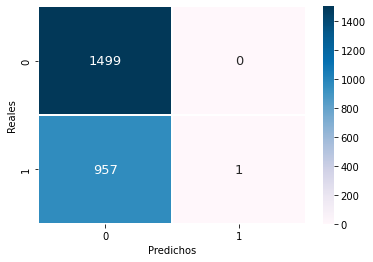

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion

model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Recall del modelo de ' + model_name + ' :   ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

# **MODELO NAIVE BAYES**

In [ ]:
#Modelo Naive Bayes

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_train_pred_gnb = gnb.predict(x_train)

Accuracy del modelo de Naibe Bayes:     0.637
Recall del modelo de Naibe Bayes:       0.245
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.65      0.89      0.75      1499
           1       0.58      0.25      0.35       958

    accuracy                           0.64      2457
   macro avg       0.61      0.57      0.55      2457
weighted avg       0.62      0.64      0.59      2457



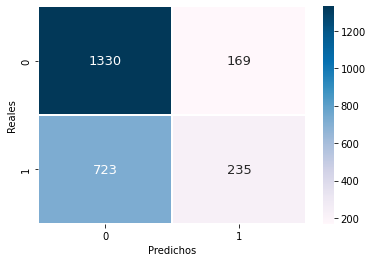

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_gnb), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
          annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de Naibe Bayes:    ', accuracy_score(y_train, y_train_pred_gnb).round(3))
print('Recall del modelo de Naibe Bayes:      ', recall_score(y_train, y_train_pred_gnb).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred_gnb))

In [ ]:
#Comportamiento en entrenamiento

umbral = 0.9
probs = gnb.predict_proba(X_train_std)[:,1]
y_pred_train_gnb_umbral = probs > umbral

Accuracy del modelo de NaiveBayes:     0.39
Recall del modelo de NaiveBayes:     1.0
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1499
           1       0.39      1.00      0.56       958

    accuracy                           0.39      2457
   macro avg       0.19      0.50      0.28      2457
weighted avg       0.15      0.39      0.22      2457



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


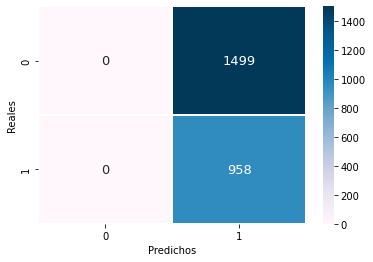

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_gnb_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de NaiveBayes:    ', accuracy_score(y_train, y_pred_train_gnb_umbral).round(3))
print('Recall del modelo de NaiveBayes:    ', recall_score(y_train, y_pred_train_gnb_umbral).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_pred_train_gnb_umbral))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

Accuracy del modelo de NaiveBayes (Testeo):     0.391
Recall del modelo de Naive Bayes (Testeo):      1.0
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       499
           1       0.39      1.00      0.56       320

    accuracy                           0.39       819
   macro avg       0.20      0.50      0.28       819
weighted avg       0.15      0.39      0.22       819



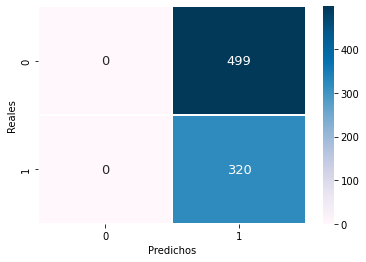

In [ ]:
#Comportamiento en testeo

probs = gnb.predict_proba(X_test_std)[:,1]
y_pred_test_gnb_umbral = probs > umbral

sns.heatmap(confusion_matrix(y_test, y_pred_test_gnb_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de NaiveBayes (Testeo):    ', accuracy_score(y_test, y_pred_test_gnb_umbral).round(3))
print('Recall del modelo de Naive Bayes (Testeo):     ', recall_score(y_test, y_pred_test_gnb_umbral).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_test, y_pred_test_gnb_umbral))

# **5. MODELO ADA BOOST**

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

In [ ]:
ada.fit(X_train_std, y_train)

y_train_pred_ada = ada.predict(X_train_std)

Accuracy del modelo de AdaBoost:     1.0
Recall del modelo de AdaBoost:     1.0


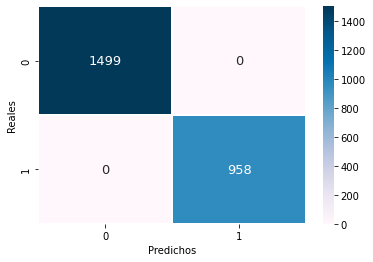

In [ ]:
#Comportamiento en el entrenamiento
umbral = 0.5
probs = ada.predict_proba(X_train_std)[:,1]
y_pred_train_ada_umbral = probs > umbral

sns.heatmap(confusion_matrix(y_train, y_pred_train_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost:    ', accuracy_score(y_train, y_pred_train_ada_umbral).round(3))
print('Recall del modelo de AdaBoost:    ', recall_score(y_train, y_pred_train_ada_umbral).round(3))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy del modelo de AdaBoost (Testeo):     0.585
Recall del modelo de AdaBoost (Testeo):     0.434


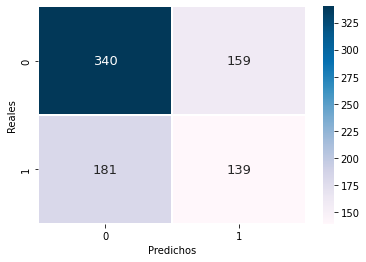

In [ ]:
#Comportamiento en el testeo

probs = ada.predict_proba(X_test_std)[:,1]
y_pred_test_ada_umbral = probs > umbral

sns.heatmap(confusion_matrix(y_test, y_pred_test_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost (Testeo):    ', accuracy_score(y_test, y_pred_test_ada_umbral).round(3))
print('Recall del modelo de AdaBoost (Testeo):    ', recall_score(y_test, y_pred_test_ada_umbral).round(3))

In [ ]:
#Parametros

dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

#lrc = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='saga', tol=0.001, max_iter=1500)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

In [ ]:
param_grid = {'base_estimator__max_depth': [2, 3, 5],
              'base_estimator__min_samples_split': [6, 24, 96],
              'base_estimator__max_features': [None, 10, 6],
              'base_estimator__class_weight': [None, 'balanced'],
              'base_estimator__splitter': ["best", "random"],
              'n_estimators': [10, 30, 100],
              'learning_rate': [0.3, 0.5, 0.7]
             }

In [ ]:
#scorer = make_scorer(fbeta_score, beta=4)

grid_obj = GridSearchCV(ada, param_grid, scoring = 'recall', n_jobs=-1, verbose=1, cv=3)

In [ ]:
grid_fit = grid_obj.fit(x_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
972 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
972 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 146, in fit
    iboost, X, y, sample_weight, random_state
  File "/usr/local

In [ ]:
best_ada = grid_fit.best_estimator_
print(grid_fit.best_params_)
print(grid_fit.best_score_)
y_train_pred_ada_opt = best_ada.predict(x_train)
y_test_pred_ada_opt = best_ada.predict(x_test)

{'base_estimator__class_weight': 'balanced', 'base_estimator__max_depth': 5, 'base_estimator__max_features': None, 'base_estimator__min_samples_split': 96, 'base_estimator__splitter': 'random', 'learning_rate': 0.7, 'n_estimators': 10}
0.5334182340647858


Accuracy del modelo de AdaBoost optimizado:     0.661
Recall del modelo de AdaBoost optimizado:     0.508


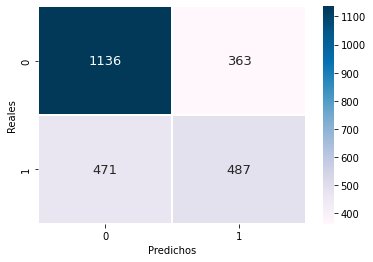

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada_opt), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost optimizado:    ', accuracy_score(y_train, y_train_pred_ada_opt).round(3))
print('Recall del modelo de AdaBoost optimizado:    ', recall_score(y_train, y_train_pred_ada_opt).round(3))

# **CONCLUSIÓN**

Apreciamos que los modelos aplicados no brindan una predicción coherente, no están pudiendo establecer un vínculo entre las features y el target. El ada Boost muestra claro un overfiting que se refleja en el testeo con un pobre rendimiento. 

Tal cual se previno en el preprocesamiento de datos, no es posible generar un modelo fiable con este data set, el problema es claro los datos no son fiables y puede presumirse que han sido generados de forma aleatoria y no por muestras reales. 

En conclusión, los datos obtenidos por el data set no son adecuados para generar ningún tipo de análisis serio o creación de algún modelo de predicción.